[*********************100%***********************]  1 of 1 completed


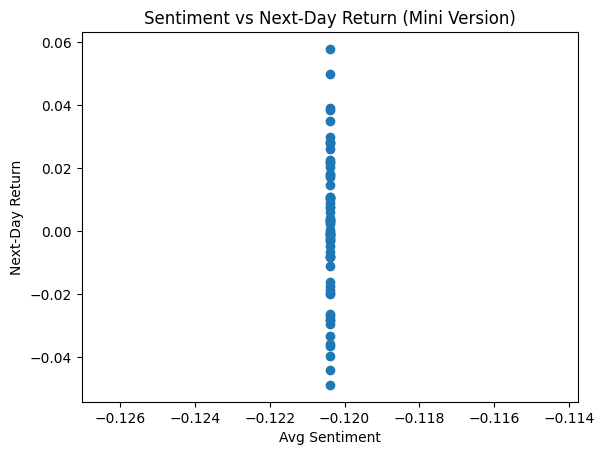

In [ ]:
import yfinance as yf
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Stock & data
ticker = "NVDA"
data = yf.download(ticker, period="3mo", auto_adjust=True)  # auto-adjusted Close
data['Return'] = data['Close'].pct_change()

# Sample news headlines (replace with API in real version)
headlines = [
    "Nvidia beats earnings expectations",
    "Nvidia stock falls after market turmoil",
    "Nvidia launches new GPU"
]

# Sentiment analysis
analyzer = SentimentIntensityAnalyzer()
sentiment = [analyzer.polarity_scores(h)['compound'] for h in headlines]

# Simple correlation: average sentiment vs next-day return
avg_sentiment = sum(sentiment)/len(sentiment)
next_day_return = data['Return'].shift(-1)  # all next-day returns

# Plot
plt.scatter([avg_sentiment]*len(data), next_day_return)
plt.xlabel("Avg Sentiment")
plt.ylabel("Next-Day Return")
plt.title("Sentiment vs Next-Day Return (Mini Version)")
plt.show()
